In [1]:
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#### Data updated daily 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [2]:
df = pd.read_csv('../data/time_series_19-covid-Confirmed.csv')

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
columns = ['Province/State', 'Lat', 'Long']
df.drop(columns, axis=1, inplace=True)

In [5]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,82,114,147,177,212,272,322,411,599,599.0
1,Japan,2,1,2,2,4,4,7,7,11,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,Singapore,0,1,3,3,4,5,7,7,10,...,212,226,243,266,313,345,385,432,455,455.0
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,Malaysia,0,0,0,3,4,4,4,7,8,...,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Jersey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,Puerto Rico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,Republic of the Congo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,The Bahamas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


### 

In [6]:
selected_countries = ['Poland', 'Germany', 'Italy']
poland_and_neighbours = df[df['Country/Region'].isin(selected_countries)]

In [7]:
poland_and_neighbours

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
11,Germany,0,0,0,0,0,1,4,4,4,...,4585,5795,7272,9257,12327,15320,19848,22213,24873,24873.0
16,Italy,0,0,0,0,0,0,0,0,0,...,21157,24747,27980,31506,35713,41035,47021,53578,59138,59138.0
73,Poland,0,0,0,0,0,0,0,0,0,...,103,119,177,238,251,355,425,536,634,634.0


--------------------------------
## Number of cases per day

`germany_non_zero` - Removed columns containg all zeros (no infections in any country)


X axis starts the day when the first infection was recorded among the selected countries

Oś X zaczyna się w dniu kiedy zanotowano pierwszą infekcję pośród wybranych krajów


In [8]:
germany_non_zero = poland_and_neighbours.loc[:, (poland_and_neighbours != 0).any()]

In [9]:
poland = germany_non_zero[germany_non_zero['Country/Region'] == 'Poland']
poland = poland.loc[:, poland.columns != 'Country/Region']

italy = germany_non_zero[germany_non_zero['Country/Region'] == 'Italy']
italy = italy.loc[:, italy.columns != 'Country/Region']

germany = germany_non_zero[germany_non_zero['Country/Region'] == 'Germany']
germany = germany.loc[:, germany.columns != 'Country/Region']

#### We calculate total number of days the epidemic lasts among selected countries
#### Obliczamy ilość dni trwania epidemii pośród wybranych krajów

In [10]:
total_days_count = max([len(germany.columns), len(italy.columns), len(poland.columns)])
total_days_count

57

In [11]:
daily_35pp_increase = [1]
daily_20pp_increase = [1]
for i in range(1, total_days_count):
    daily_35pp_increase.append(1.35 * daily_35pp_increase[i-1])
    daily_20pp_increase.append(1.20 * daily_20pp_increase[i-1])

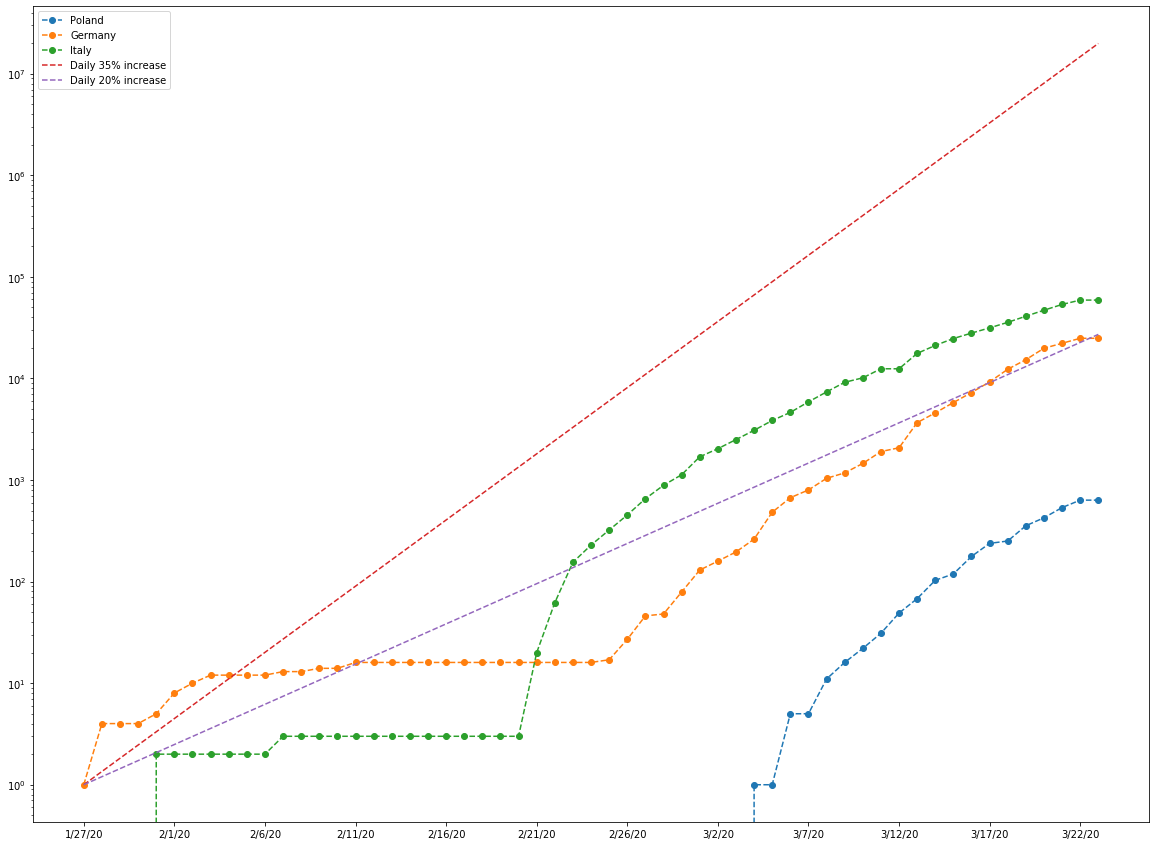

In [12]:
tick_spacing = 5

fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(poland.columns, poland.iloc[0, :], linestyle='dashed', marker='o')
ax.plot(germany.columns, germany.iloc[0, :], linestyle='dashed', marker='o')
ax.plot(italy.columns, italy.iloc[0, :], linestyle='dashed', marker='o')
ax.plot(germany.columns, daily_35pp_increase, linestyle='dashed')
ax.plot(germany.columns, daily_20pp_increase, linestyle='dashed')

plt.yscale('log')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.legend(['Poland', 'Germany', 'Italy', 'Daily 35% increase', 'Daily 20% increase'])

plt.show()

## Number of cases normalized X axis
Here X axis is normalized - (0,1) is the point of the first infection in each country

X axis shows the day of the epidemic in each country.

Oś X pokazuje dzień epidemii w danym kraju

In [13]:
germany = poland_and_neighbours[poland_and_neighbours['Country/Region'] == 'Germany']
poland = poland_and_neighbours[poland_and_neighbours['Country/Region'] == 'Poland']
italy = poland_and_neighbours[poland_and_neighbours['Country/Region'] == 'Italy']

germany_non_zero = germany.loc[:, (germany != 0).any()]
poland_non_zero = poland.loc[:, (poland != 0).any()]
italy_non_zero = italy.loc[:, (italy != 0).any()]

In [14]:
poland = poland_non_zero.loc[:, poland_non_zero.columns != 'Country/Region']
italy = italy_non_zero.loc[:, italy_non_zero.columns != 'Country/Region']
germany = germany_non_zero.loc[:, germany_non_zero.columns != 'Country/Region']

In [15]:
x_axis = range(0, total_days_count)

/Users/tomaszwisniewski/anaconda3/envs/covid/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


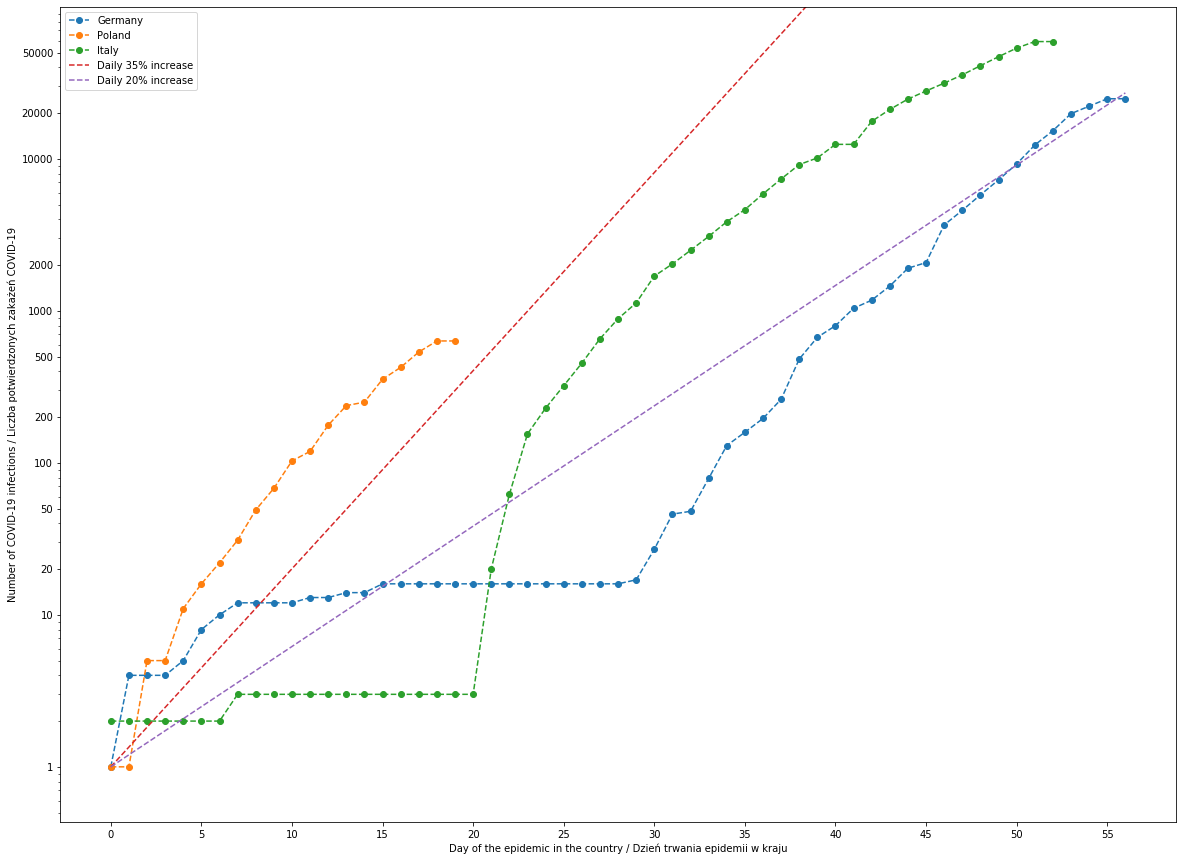

In [16]:
tick_spacing = 5

fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, germany.iloc[0, :], linestyle='dashed', marker='o')
ax.plot(x_axis[0:len(poland.columns)], poland.iloc[0, :], linestyle='dashed', marker='o')
ax.plot(x_axis[0:len(italy.columns)], italy.iloc[0, :], linestyle='dashed', marker='o')
ax.plot(x_axis, daily_35pp_increase, linestyle='dashed')
ax.plot(x_axis, daily_20pp_increase, linestyle='dashed')

#set scale to logarithmic with max value of 100 000
plt.yscale('log')
plt.ylim(0, 100000)
plt.yticks([1, 10, 20, 50, 100, 200, 500, 1000, 2000, 10000, 20000, 50000])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#set legend and labels
ax.legend(['Germany', 'Poland', 'Italy', 'Daily 35% increase', 'Daily 20% increase'])
plt.ylabel('Number of COVID-19 infections / Liczba potwierdzonych zakażeń COVID-19')
plt.xlabel('Day of the epidemic in the country / Dzień trwania epidemii w kraju')

plt.show()

In [17]:
poland

,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
73,1,1,5,5,11,16,22,31,49,68,103,119,177,238,251,355,425,536,634,634.0


### Poland new confirmed cases since yesterday / Nowe potwierdzone przypadki od wczoraj

In [18]:
number_of_cases_yesterday = poland.iloc[-1][-1] - poland.iloc[-1][-2]

In [19]:
print(f'New confirmed cases since yesterday / Nowe potwierdzone przypadki od wczoraj: {number_of_cases_yesterday}')

New confirmed cases since yesterday / Nowe potwierdzone przypadki od wczoraj: 0.0
